##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorBoard DataFrame API

## Overview

TensorBoard provides an interactive GUI for viewing data logs from machine-learning training jobs. However, users sometimes want to **programmatically** read the data logs stored in TensorBoard, for purposes such as performing custom analyses and creating custom visualizations of the log data.

A feature is introduced in TensorBoard v2.3 to support this use case:  `tensorboard.data.experimental.ExperimentFromDev()`. It allows prgorammatic access to TensorBoard's scalar logs.

Please note:
1. the API is still in its experimental stage, as reflected by its API namespace. This means the API may be subject to breaking changes in the future.
2. this API currently supports only experimental uploaded to [tensorboard.dev](https://tensorboard.dev).   Support for locally stored TensorBoard logdir will be added in the future 

## Setup

pandas must be installed alongside tensorboard to make the new API usable.
If you intend to make custom plots by using the data output by the new API, matplotlib must be installed as well.

In [ ]:
!pip install pandas matplotlib
!pip install tensorboard

In [1]:
from packaging import version

from matplotlib import pyplot
import tensorboard as tb

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or above."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.3.0a20200615


## Loading TensorBoard scalars as a pandas.DataFrame

In [3]:
experiment_id = "AdYd1TgeTlaLWXx6I8JUbA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df1 = experiment.get_scalars()
df1

,run,tag,step,value
0,"lr_1E-03,conv=1,fc=2",accuracy/accuracy,0,0.150000
1,"lr_1E-03,conv=1,fc=2",accuracy/accuracy,5,0.340000
2,"lr_1E-03,conv=1,fc=2",accuracy/accuracy,10,0.480000
3,"lr_1E-03,conv=1,fc=2",accuracy/accuracy,15,0.540000
4,"lr_1E-03,conv=1,fc=2",accuracy/accuracy,20,0.740000
...,...,...,...,...
3203,"lr_1E-04,conv=2,fc=2",xent/xent_1,1980,0.012492
3204,"lr_1E-04,conv=2,fc=2",xent/xent_1,1985,0.018683
3205,"lr_1E-04,conv=2,fc=2",xent/xent_1,1990,0.052482
3206,"lr_1E-04,conv=2,fc=2",xent/xent_1,1995,0.102685


## Making custom plots using the DataFrame

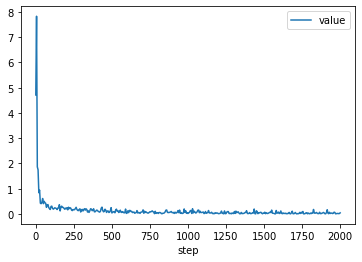

In [4]:
# To make a plot using the dataframe:
data = df1[df1["run"] == "lr_1E-03,conv=1,fc=2"]
data = data[data["tag"] == "xent/xent_1"]
data.plot(x="step", y="value")